In [ ]:
#Import Libraries

import numpy as np #Numerical Computing.
import os #I/O.
import tensorflow as tf #Machine Learning.
from tensorflow.keras.preprocessing import image_dataset_from_directory #Dataset Generator.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from skimage.transform import resize
from skimage.io import imread
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import pickle
from sklearn import metrics
import cv2 

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.filters.rank import entropy
from skimage.morphology import disk
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "../content/drive/MyDrive/Bio/Data.zip" -d "/content"

Output streaming troncato alle ultime 5000 righe.
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_180.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1800.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1801.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1802.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1803.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1804.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1805.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1806.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1807.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1808.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1809.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_181.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1810.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1811.jpg  
  inflating: /content/TRAIN.4/N/TRAIN.4_NBIODEG_VFL_1812.jpg  
  infla

Scegli quale filtro usare:1
../content/TRAIN.1/B
0
1
2
3
4
5
6
7
8
9
10


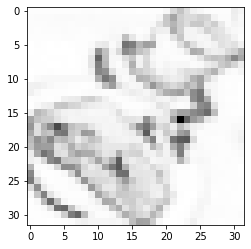

11
12
13
14
15
16
17
18
19
20


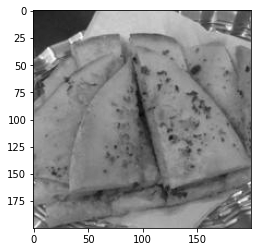

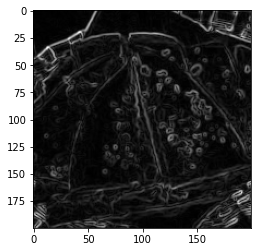

21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
sezione 0 caricata
../content/TRAIN.1/N
0
1
2
3
4
5
6
7
8
9
10


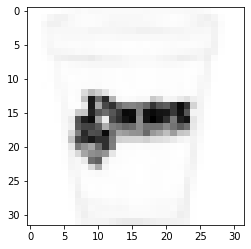

11
12
13
14
15
16
17
18
19
20


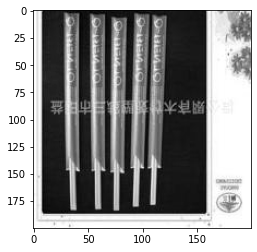

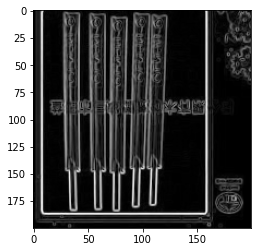

21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
sezione 1 caricata
look -> (1024,)
entro nella zona1
è la zona 2 a darmi problemi?
entro nella zona2
fatto


In [ ]:
Categories = ['B','N']
flat_data_arr = []
target_arr = []




#setto i percorsi

pathB = '../content/TRAIN.1/B'


pathN ='../content/TRAIN.1/N'

listPath = [pathB, pathN]


#scelgo quale filtro usare
filtro = int(input("Scegli quale filtro usare:"))



#LOAD BIO
for i in range (0,2):
  conteggio = 0
  path = listPath[i]
  print(path)
  for img in os.listdir(path):
    if(conteggio == 100):break
    print(conteggio)

    img_array = imread(os.path.join(path,img), as_gray=True) #immagine

    if(filtro == -1):
      img = resize(img_array, (200,200))
      print(f"max img -> {img.max()}")
      flat_data_arr.append(img.flatten())



    if(filtro == 0):
       img_array = np.float32(img_array) # per fare la dft
       dft = cv2.dft(img_array, flags = cv2.DFT_COMPLEX_OUTPUT)
       dft_shift = np.fft.fftshift(dft) #center to the centre
       img_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)
       img_spectrum = resize(img_spectrum,(32,32))
       flat_data_arr.append(img_spectrum.flatten())
    if(filtro == 1):
      sobel_img = sobel(img_array)
      if (conteggio==20):
        plt.imshow(img_array, cmap='gray')
        plt.show()
        plt.imshow(sobel_img, cmap='gray')
        plt.show()
      sobel_img = resize(sobel_img,(32,32))
      flat_data_arr.append(sobel_img.flatten())
      if conteggio == 10:
        plt.imshow(sobel_img, cmap ='Greys')
        plt.show()
      
    if (filtro == 2):
      entropy_img = entropy(img_array, disk(1))
      entropy_img = resize(entropy_img,(32,32))
      flat_data_arr.append(entropy_img.flatten())
      if conteggio==10:
        plt.imshow(entropy_img)
        plt.show()





    '''
    (r, g, b) = cv2.split(img_array)
    #Questa sezione è stata scritta per analizzare i 3 canali RGB 
    if(choose == 0):
      imgc = img_array
    elif(choose == 1):
      imgc = r
    elif (choose == 2):
      imgc = g
    else:
      imgc = b
    
    if(choose ==0):
      img_resized = resize(imgc,(32,32,3))
    else:
      img_resized = resize(imgc,(32,32))
    flat_data_arr.append(img_resized.flatten())
    ''' 
    target_arr.append(Categories.index(Categories[i]))
    conteggio = conteggio + 1
  print(f"sezione {i} caricata")

print(f"look -> {flat_data_arr[0].shape}")
print("entro nella zona1")
flat_data = np.array(flat_data_arr)
print("è la zona 2 a darmi problemi?")
target = np.array(target_arr)

#Creo un dataframe dai dati np
print("entro nella zona2")
df = pd.DataFrame(flat_data)
df['Target'] = target
print("fatto")

In [ ]:
x=df.iloc[:,:-1] # qui prendo l'immagine (tranne la label)
y=df.iloc[:,-1] # qui prendo solo la label


print(np.unique(y))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50,random_state=77,stratify=y)

print(f" max -> {x.max()}")
print(y)
print(df['Target'])

[0 1]
 max -> 0       0.940497
1       0.953399
2       0.949321
3       0.939469
4       0.934149
          ...   
1019    0.855721
1020    0.867082
1021    0.825378
1022    0.828980
1023    0.857708
Length: 1024, dtype: float64
0        0
1        0
2        0
3        0
4        0
        ..
11995    1
11996    1
11997    1
11998    1
11999    1
Name: Target, Length: 12000, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
11995    1
11996    1
11997    1
11998    1
11999    1
Name: Target, Length: 12000, dtype: int64


In [ ]:
scelta_modello = int(input("scegli il modello:"))

#SVM
if(scelta_modello == 0):
  #param_grid={'C':[10,0.1],'kernel':['linear','poly','rbf'], 'gamma':[0.1,1]} 
  #param_grid={'C':[1],'kernel':['poly'], 'gamma':[0.1]} 


  param_grid={'kernel':['rbf','poly'], 'gamma':[1, 10,100]} 

  svc=svm.SVC(probability=True)
  print("inizio allenamento")
  model=GridSearchCV(svc,param_grid)  

  # test if CPU and GPU are visible
  c = tf.config.get_visible_devices()
  print(c)
  # [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
  #  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]  

  model.fit(x_train,y_train)
  print('Fine allenamento')
  print(model.best_params_)

#RANDOM FOREST
elif(scelta_modello == 1):
  param_grid = {'bootstrap':[True], 'n_estimators':[300,400,500], 'max_depth':[50,70]}
  clf=RandomForestClassifier(n_estimators=100)
  print("inizio allenamento")
  model=GridSearchCV(clf, param_grid)
  model.fit(x_train,y_train)
  print("fine allenamento")
  print (model.best_params_)


#KNN
elif(scelta_modello == 2):
  knn = KNeighborsClassifier()
  k_range = list(range(3,15,2))
  param_grid = dict(n_neighbors = k_range, weights = ["distance"], metric=["manhattan"])
  grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=2)
  #fitting the model for grid search
  grid_search = grid.fit(x_train, y_train)
  print(grid_search.best_params_)
  model = grid_search


scegli il modello:2
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   6.3s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   6.4s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   6.3s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   5.9s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   6.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   6.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   5.9s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   6.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   6.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   5.9s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   5.9s
[CV] END ..metric=manhattan, 

In [ ]:
model = grid_search

In [ ]:
y_pred = model.predict(x_test)
print(f"predizione modello -> {y_pred}")
print(f"label reali -> {np.array(y_test)}")

predizione modello -> [0 1 1 ... 0 1 0]
label reali -> [1 1 1 ... 1 1 0]


The model is 56.03333333333333% accurate


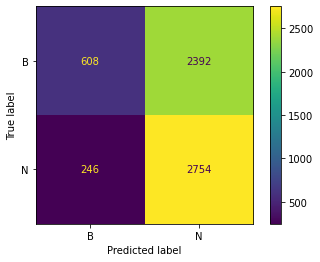

Precision: 53.517294986397204% 
Sensitivity: 91.8% 
Specificity: 20.266666666666666% 
F-Score: 67.61600785661675


In [ ]:
#vediamo l'accuratezza:
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay (confusion_matrix = confusion_matrix, display_labels = ['B','N'])
cm_display.plot()
plt.show()
#Metrics
#of the positives predicted, what percentage is truly positive?
precision = metrics.precision_score(y_test, y_pred)
print(f"Precision: {precision*100}% ")
#how good the model is at predicting positives?
sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(f"Sensitivity: {sensitivity_recall*100}% ")
#how good the model is at predicting negatives?
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print(f"Specificity: {specificity*100}% ")
f1_score = metrics.f1_score(y_test, y_pred)
print(f"F-Score: {f1_score * 100}")